In [ ]:
from build_nba_bdd import scrape_nba_bdd

# Création de la BDD
scrape_nba_bdd(season_types=['Regular Season', 'Playoffs'])

In [21]:
import pandas as pd

# Chargement de la base de données contenant les infos + performances des joueurs de la saison 99-00 à 24-25
df = pd.read_csv('./data/merged_data.csv')

print(f"Dataset chargé: {len(df)} lignes, {len(df.columns)} colonnes")
print(f"\nAperçu des colonnes:")
print(df.columns.tolist())

Dataset chargé: 10284 lignes, 78 colonnes

Aperçu des colonnes:
['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT', 'Rank', 'Position', 'Team', 'Salary', 'Season', 'TEAM_W_PCT', 'Year', 'adjusted_salary', 'next_adjusted_salary', 'Changed_team', 'YOE']


) missing from font(s) DejaVu Sans.pykernel_20184\2646411104.py:29: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.on\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


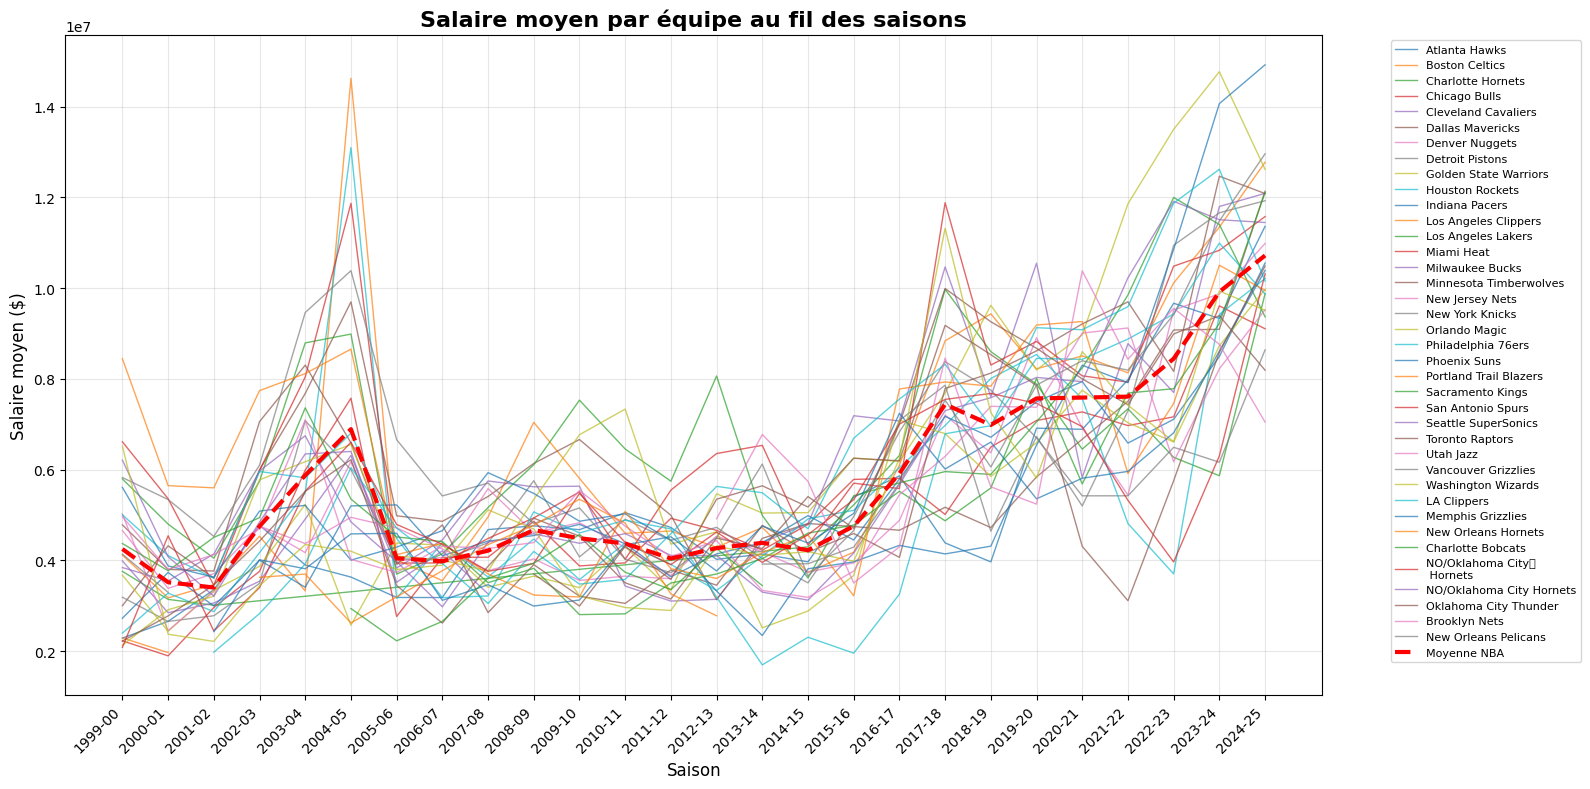

In [22]:
import matplotlib.pyplot as plt

# Calcul du salaire moyen par équipe par an
salary_by_team_year = df.groupby(['Season', 'Team'])['Salary'].mean().reset_index()
salary_by_team_year.columns = ['Season', 'Team', 'Average_Salary']

# Calcul du salaire moyen global par saison (toutes équipes confondues)
salary_avg_global = df.groupby('Season')['Salary'].mean().reset_index()
salary_avg_global.columns = ['Season', 'Average_Salary']

# Création du graphique
plt.figure(figsize=(16, 8))

# Tracer une ligne pour chaque équipe
for team in salary_by_team_year['Team'].unique():
    team_data = salary_by_team_year[salary_by_team_year['Team'] == team]
    plt.plot(team_data['Season'], team_data['Average_Salary'], label=team, alpha=0.7, linewidth=1)

# Tracer la moyenne globale en mise en valeur
plt.plot(salary_avg_global['Season'], salary_avg_global['Average_Salary'], 
         color='red', linewidth=3, label='Moyenne NBA', linestyle='--', zorder=10)

plt.title('Salaire moyen par équipe au fil des saisons', fontsize=16, fontweight='bold')
plt.xlabel('Saison', fontsize=12)
plt.ylabel('Salaire moyen ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
# Extraction des paires de variables corrélées >= 80%
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Convertir la matrice en format long et retirer les doublons
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # Enlever les corrélations parfaites (diagonale)

# Filtrer les corrélations >= 0.80 en valeur absolue
high_corr = corr_pairs[corr_pairs.abs() >= 0.80]

# Trier par valeur absolue de corrélation (du plus fort au plus faible)
high_corr_sorted = high_corr.reindex(high_corr.abs().sort_values(ascending=False).index)

# Afficher toutes les paires avec corrélation >= 80%
print(f"Variables avec une corrélation >= 80% (en valeur absolue):\n")
print("="*70)

correlations_list = []
seen = set()

for idx, corr_value in high_corr_sorted.items():
    var1, var2 = idx
    pair = tuple(sorted([var1, var2]))
    
    if pair not in seen:
        seen.add(pair)
        correlations_list.append((var1, var2, corr_value))

print(f"Nombre total de paires trouvées: {len(correlations_list)}\n")

for i, (var1, var2, corr) in enumerate(correlations_list, 1):
    print(f"{i:3d}. {var1:20s} <-> {var2:20s} : {corr:+.4f}")

print("\n" + "="*70)

Variables avec une corrélation >= 80% (en valeur absolue):

Nombre total de paires trouvées: 172

  1. NBA_FANTASY_PTS_RANK <-> WNBA_FANTASY_PTS_RANK : +0.9957
  2. WNBA_FANTASY_PTS     <-> NBA_FANTASY_PTS      : +0.9949
  3. FGM_RANK             <-> PTS_RANK             : +0.9924
  4. FGM                  <-> PTS                  : +0.9895
  5. FG3A                 <-> FG3M                 : +0.9857
  6. MIN_RANK             <-> MIN                  : -0.9835
  7. FGA_RANK             <-> PTS_RANK             : +0.9834
  8. FGA                  <-> PTS                  : +0.9821
  9. FTA_RANK             <-> FTM_RANK             : +0.9821
 10. FTM                  <-> FTA                  : +0.9821
 11. W_RANK               <-> W                    : -0.9816
 12. FGM                  <-> FGA                  : +0.9793
 13. FGM_RANK             <-> FGA_RANK             : +0.9780
 14. adjusted_salary      <-> Salary               : +0.9779
 15. FG3A_RANK            <-> FG3M_RANK        

In [24]:
# Nettoyage de la BDD : suppression des variables redondantes (corrélation >= 80%)

# Fonction pour identifier les colonnes à supprimer
def remove_highly_correlated_features(dataframe, threshold=0.80, protected_cols=None):
    """
    Supprime les variables ayant une corrélation >= threshold
    En cas de corrélation élevée entre deux variables, on garde celle qui a 
    la corrélation moyenne la plus faible avec les autres variables
    
    protected_cols: liste des colonnes à ne jamais supprimer
    """
    if protected_cols is None:
        protected_cols = []
    
    # Sélectionner uniquement les colonnes numériques
    numeric_df = dataframe.select_dtypes(include=['float64', 'int64'])
    
    # Calculer la matrice de corrélation
    corr_matrix = numeric_df.corr().abs()
    
    # Identifier les paires de variables hautement corrélées
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # Trouver les colonnes à supprimer
    to_drop = set()
    
    for column in upper_triangle.columns:
        # Trouver les variables corrélées à >= threshold avec cette colonne
        high_corr_vars = upper_triangle.index[upper_triangle[column] >= threshold].tolist()
        
        if high_corr_vars:
            # Calculer la corrélation moyenne de chaque variable avec toutes les autres
            for var in high_corr_vars:
                if column not in to_drop and var not in to_drop:
                    # Vérifier si l'une des deux variables est protégée
                    column_protected = column in protected_cols
                    var_protected = var in protected_cols
                    
                    # Si les deux sont protégées, ne rien faire
                    if column_protected and var_protected:
                        print(f"'{column}' et '{var}' sont toutes deux protégées (corr: {upper_triangle.loc[var, column]:.3f})")
                        continue
                    
                    # Si seulement column est protégée, supprimer var
                    elif column_protected:
                        to_drop.add(var)
                        print(f"Suppression de '{var}' - corrélée à '{column}' [PROTÉGÉE] (corr: {upper_triangle.loc[var, column]:.3f})")
                    
                    # Si seulement var est protégée, supprimer column
                    elif var_protected:
                        to_drop.add(column)
                        print(f"Suppression de '{column}' - corrélée à '{var}' [PROTÉGÉE] (corr: {upper_triangle.loc[var, column]:.3f})")
                    
                    # Si aucune n'est protégée, utiliser la logique habituelle
                    else:
                        # Corrélation moyenne (excluant soi-même)
                        avg_corr_column = corr_matrix[column].drop(column).mean()
                        avg_corr_var = corr_matrix[var].drop(var).mean()
                        
                        # Supprimer celle qui a la plus forte corrélation moyenne
                        if avg_corr_column > avg_corr_var:
                            to_drop.add(column)
                            print(f"Suppression de '{column}' (corr. moy: {avg_corr_column:.3f}) - corrélée à '{var}' (corr: {upper_triangle.loc[var, column]:.3f})")
                        else:
                            to_drop.add(var)
                            print(f"Suppression de '{var}' (corr. moy: {avg_corr_var:.3f}) - corrélée à '{column}' (corr: {upper_triangle.loc[var, column]:.3f})")
    
    return list(to_drop)

# Import numpy si nécessaire
import numpy as np

# Définir les colonnes à protéger
protected_columns = ['Salary', 'adjusted_salary', 'next_adjusted_salary']

# Identifier les colonnes à supprimer
print("Analyse des corrélations et identification des variables redondantes...\n")
print(f"Colonnes protégées: {protected_columns}\n")
print("="*80)
columns_to_drop = remove_highly_correlated_features(df, threshold=0.80, protected_cols=protected_columns)

print("\n" + "="*80)
print(f"\nRésumé:")
print(f"  • Variables à supprimer: {len(columns_to_drop)}")
print(f"  • Variables conservées: {len(df.select_dtypes(include=['float64', 'int64']).columns) - len(columns_to_drop)}")

# Créer le DataFrame nettoyé
df_cleaned = df.drop(columns=columns_to_drop)

print(f"\nDataset nettoyé:")
print(f"  • Avant: {len(df.columns)} colonnes")
print(f"  • Après: {len(df_cleaned.columns)} colonnes")
print(f"  • Colonnes supprimées: {columns_to_drop}")

# Sauvegarder le dataset nettoyé (optionnel)
# df_cleaned.to_csv('./data/merged_data_cleaned.csv', index=False)
# print("\n✅ Dataset nettoyé sauvegardé dans './data/merged_data_cleaned.csv'")

Analyse des corrélations et identification des variables redondantes...

Colonnes protégées: ['Salary', 'adjusted_salary', 'next_adjusted_salary']

Suppression de 'GP' (corr. moy: 0.389) - corrélée à 'W' (corr: 0.811)
Suppression de 'MIN' (corr. moy: 0.549) - corrélée à 'FGM' (corr: 0.885)
Suppression de 'FGM' (corr. moy: 0.535) - corrélée à 'FGA' (corr: 0.979)
Suppression de 'FG3A' (corr. moy: 0.315) - corrélée à 'FG3M' (corr: 0.986)
Suppression de 'FGA' (corr. moy: 0.522) - corrélée à 'FTM' (corr: 0.842)
Suppression de 'FTA' (corr. moy: 0.477) - corrélée à 'FTM' (corr: 0.982)
Suppression de 'REB' (corr. moy: 0.433) - corrélée à 'OREB' (corr: 0.873)
Suppression de 'TOV' (corr. moy: 0.486) - corrélée à 'FTM' (corr: 0.804)
Suppression de 'PTS' (corr. moy: 0.534) - corrélée à 'FTM' (corr: 0.895)
Suppression de 'NBA_FANTASY_PTS' (corr. moy: 0.560) - corrélée à 'FTM' (corr: 0.848)
Suppression de 'WNBA_FANTASY_PTS' (corr. moy: 0.561) - corrélée à 'FTM' (corr: 0.859)
Suppression de 'W_RANK' 

In [25]:
print(df_cleaned.columns)

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'W', 'L', 'FG_PCT', 'FG3M', 'FG3_PCT', 'FTM', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'DD2', 'TD3', 'GP_RANK',
       'FG3_PCT_RANK', 'FT_PCT_RANK', 'TOV_RANK', 'PFD_RANK',
       'PLUS_MINUS_RANK', 'DD2_RANK', 'TD3_RANK', 'TEAM_COUNT', 'Rank',
       'Position', 'Team', 'Salary', 'Season', 'TEAM_W_PCT', 'Year',
       'adjusted_salary', 'next_adjusted_salary', 'Changed_team', 'YOE'],
      dtype='object')


C:\Users\lunat\AppData\Local\Temp\ipykernel_20184\639581595.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_salary, y='Position', x='adjusted_salary', order=positions_order, palette='Set2')


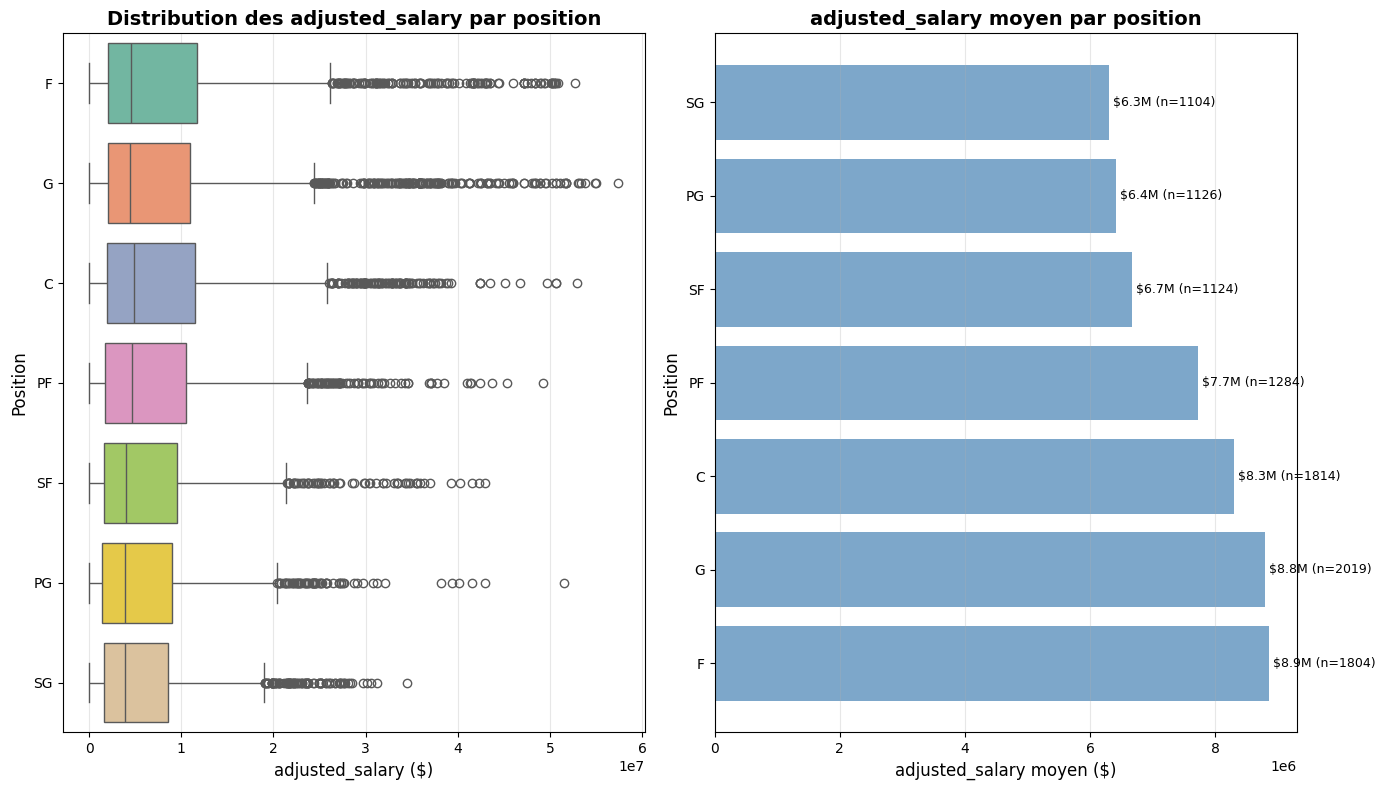


Résumé des salaires par position:
Position  mean_millions  median_millions  count
       F       8.863940         4.570536   1804
       G       8.797680         4.402980   2019
       C       8.300395         4.867920   1814
      PF       7.721727         4.649940   1284
      SF       6.674962         3.963011   1124
      PG       6.410688         3.881090   1126
      SG       6.303262         3.877799   1104


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique du salaire moyen par position
plt.figure(figsize=(14, 8))

# Vérifier si la colonne Position existe
if 'Position' in df_cleaned.columns:
    # Filtrer les données avec salaire non nul et exclure la position 'GF'
    df_with_salary = df_cleaned[(df_cleaned['adjusted_salary'].notna()) & 
                                 (df_cleaned['adjusted_salary'] > 0) & 
                                 (df_cleaned['Position'] != 'GF')]
    
    # Calculer le salaire moyen par position
    salary_by_position = df_with_salary.groupby('Position')['adjusted_salary'].agg(['mean', 'median', 'count']).reset_index()
    salary_by_position = salary_by_position.sort_values('mean', ascending=False)
    
    # Créer un boxplot pour montrer la distribution
    plt.subplot(1, 2, 1)
    positions_order = salary_by_position['Position'].tolist()
    sns.boxplot(data=df_with_salary, y='Position', x='adjusted_salary', order=positions_order, palette='Set2')
    plt.title('Distribution des adjusted_salary par position', fontsize=14, fontweight='bold')
    plt.xlabel('adjusted_salary ($)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Créer un graphique en barres pour le salaire moyen
    plt.subplot(1, 2, 2)
    bars = plt.barh(salary_by_position['Position'], salary_by_position['mean'], color='steelblue', alpha=0.7)
    plt.title('adjusted_salary moyen par position', fontsize=14, fontweight='bold')
    plt.xlabel('adjusted_salary moyen ($)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, (pos, val, count) in enumerate(zip(salary_by_position['Position'], 
                                                salary_by_position['mean'], 
                                                salary_by_position['count'])):
        plt.text(val, i, f' ${val/1e6:.1f}M (n={count})', 
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Afficher le tableau récapitulatif
    print("\nRésumé des salaires par position:")
    print("="*80)
    salary_by_position['mean_millions'] = salary_by_position['mean'] / 1e6
    salary_by_position['median_millions'] = salary_by_position['median'] / 1e6
    print(salary_by_position[['Position', 'mean_millions', 'median_millions', 'count']].to_string(index=False))
    
else:
    print("La colonne 'Position' n'existe pas dans le dataset.")
    print(f"Colonnes disponibles: {df_cleaned.columns.tolist()}")


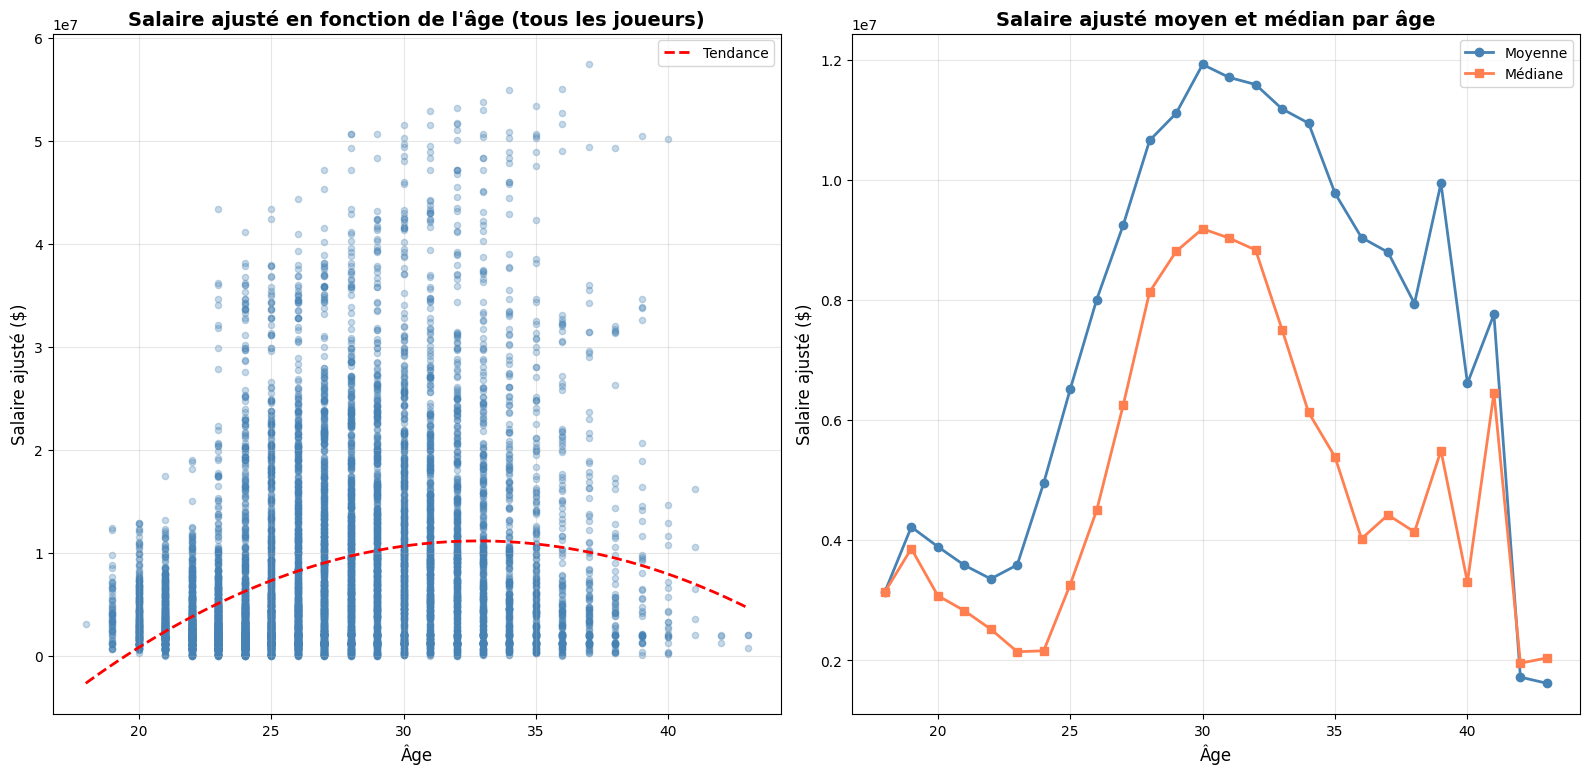

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Graphique du salaire ajusté en fonction de l'âge
plt.figure(figsize=(16, 8))

# Vérifier si les colonnes nécessaires existent
if 'AGE' in df_cleaned.columns and 'adjusted_salary' in df_cleaned.columns:
    # Filtrer les données avec salaire ajusté non nul
    df_age_salary = df_cleaned[(df_cleaned['adjusted_salary'].notna()) & 
                                (df_cleaned['adjusted_salary'] > 0) &
                                (df_cleaned['AGE'].notna())]
    
    # Graphique 1: Scatter plot avec tendance
    plt.subplot(1, 2, 1)
    plt.scatter(df_age_salary['AGE'], df_age_salary['adjusted_salary'], 
                alpha=0.3, s=20, color='steelblue')
    
    # Ajouter une ligne de tendance polynomiale
    z = np.polyfit(df_age_salary['AGE'], df_age_salary['adjusted_salary'], 2)
    p = np.poly1d(z)
    age_range = np.linspace(df_age_salary['AGE'].min(), df_age_salary['AGE'].max(), 100)
    plt.plot(age_range, p(age_range), "r--", linewidth=2, label='Tendance')
    
    plt.title('Salaire ajusté en fonction de l\'âge (tous les joueurs)', fontsize=14, fontweight='bold')
    plt.xlabel('Âge', fontsize=12)
    plt.ylabel('Salaire ajusté ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Graphique 2: Salaire moyen et médian par âge
    plt.subplot(1, 2, 2)
    salary_by_age = df_age_salary.groupby('AGE')['adjusted_salary'].agg(['mean', 'median', 'count']).reset_index()
    
    plt.plot(salary_by_age['AGE'], salary_by_age['mean'], 
             marker='o', linewidth=2, markersize=6, label='Moyenne', color='steelblue')
    plt.plot(salary_by_age['AGE'], salary_by_age['median'], 
             marker='s', linewidth=2, markersize=6, label='Médiane', color='coral')
    
    plt.title('Salaire ajusté moyen et médian par âge', fontsize=14, fontweight='bold')
    plt.xlabel('Âge', fontsize=12)
    plt.ylabel('Salaire ajusté ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Les colonnes 'AGE' ou 'adjusted_salary' n'existent pas dans le dataset.")
    print(f"Colonnes disponibles: {df_cleaned.columns.tolist()}")


In [28]:
# Nettoyage des outliers avant prétraitement

print("="*80)
print("NETTOYAGE DES OUTLIERS")
print("="*80)

# Créer une copie pour le nettoyage
df_cleaned_outliers = df_cleaned.copy()

print(f"\nDataset initial: {len(df_cleaned_outliers)} lignes")

# 1. Supprimer les lignes avec adjusted_salary < 500k
print(f"\n1. Suppression des salaires ajustés < 500k$")
initial_count = len(df_cleaned_outliers)
df_cleaned_outliers = df_cleaned_outliers[
    (df_cleaned_outliers['adjusted_salary'].isna()) | 
    (df_cleaned_outliers['adjusted_salary'] >= 500000)
]
removed_low_salary = initial_count - len(df_cleaned_outliers)
print(f"   Lignes supprimées: {removed_low_salary}")
print(f"   Lignes restantes: {len(df_cleaned_outliers)}")

# 2. Détecter et supprimer les fins de carrière (baisse de salaire > 70%)
print(f"\n2. Détection des fins de carrière (baisse de salaire > 70%)")

# Trier par joueur et année
df_sorted = df_cleaned_outliers.sort_values(['PLAYER_ID', 'Year']).copy()

# Calculer la variation de salaire d'une année sur l'autre pour chaque joueur
df_sorted['salary_change_pct'] = df_sorted.groupby('PLAYER_ID')['adjusted_salary'].pct_change()

# Identifier les joueurs avec une baisse > 70%
career_end_mask = df_sorted['salary_change_pct'] <= -0.70

# Pour chaque joueur ayant une baisse > 70%, marquer toutes les lignes à partir de cette baisse
players_to_clean = df_sorted[career_end_mask]['PLAYER_ID'].unique()
print(f"   Joueurs avec baisse > 70%: {len(players_to_clean)}")

# Liste des indices à supprimer
indices_to_drop = []

for player_id in players_to_clean:
    player_data = df_sorted[df_sorted['PLAYER_ID'] == player_id].copy()
    
    # Trouver la première année où la baisse > 70% se produit
    career_end_years = player_data[player_data['salary_change_pct'] <= -0.70]['Year'].values
    
    if len(career_end_years) > 0:
        first_career_end_year = career_end_years[0]
        
        # Supprimer toutes les données à partir de cette année
        indices_to_drop.extend(
            player_data[player_data['Year'] >= first_career_end_year].index.tolist()
        )

# Supprimer les lignes identifiées
initial_count = len(df_cleaned_outliers)
df_cleaned_outliers = df_cleaned_outliers.drop(indices_to_drop)
removed_career_end = initial_count - len(df_cleaned_outliers)

print(f"   Lignes supprimées (fin de carrière): {removed_career_end}")
print(f"   Lignes restantes: {len(df_cleaned_outliers)}")

# Résumé
print(f"\n{'='*80}")
print(f"RÉSUMÉ DU NETTOYAGE")
print(f"{'='*80}")
print(f"Dataset initial:                {len(df_cleaned)} lignes")
print(f"Supprimés (salaire < 500k):     {removed_low_salary} lignes")
print(f"Supprimés (fin de carrière):    {removed_career_end} lignes")
print(f"Total supprimé:                 {removed_low_salary + removed_career_end} lignes ({(removed_low_salary + removed_career_end)/len(df_cleaned)*100:.2f}%)")
print(f"Dataset final:                  {len(df_cleaned_outliers)} lignes")

# Remplacer df_cleaned par la version nettoyée
df_cleaned = df_cleaned_outliers.copy()

print(f"\n✅ Nettoyage des outliers terminé")
print(f"{'='*80}")

NETTOYAGE DES OUTLIERS

Dataset initial: 10284 lignes

1. Suppression des salaires ajustés < 500k$
   Lignes supprimées: 404
   Lignes restantes: 9880

2. Détection des fins de carrière (baisse de salaire > 70%)
   Joueurs avec baisse > 70%: 343
   Lignes supprimées (fin de carrière): 804
   Lignes restantes: 9076

RÉSUMÉ DU NETTOYAGE
Dataset initial:                10284 lignes
Supprimés (salaire < 500k):     404 lignes
Supprimés (fin de carrière):    804 lignes
Total supprimé:                 1208 lignes (11.75%)
Dataset final:                  9076 lignes

✅ Nettoyage des outliers terminé


In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Pipeline de prétraitement des données
print("="*80)
print("PIPELINE DE PRÉTRAITEMENT DES DONNÉES")
print("="*80)

# 1. Créer une copie du dataset nettoyé
df_preprocessed = df_cleaned.copy()

print(f"\n1. Dataset initial: {df_preprocessed.shape}")

# 2. Supprimer les colonnes identifiantes non pertinentes pour l'entraînement
columns_to_remove = ['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'Team', 'Salary', 'Season', 'Year', 'adjusted_salary', 'Rank']
existing_cols_to_remove = [col for col in columns_to_remove if col in df_preprocessed.columns]

if existing_cols_to_remove:
    df_preprocessed = df_preprocessed.drop(columns=existing_cols_to_remove)
    print(f"\n2. Colonnes supprimées: {existing_cols_to_remove}")
    print(f"   Nouvelles dimensions: {df_preprocessed.shape}")
else:
    print(f"\n2. Aucune colonne identifiante à supprimer")

# 3. Catégorisation des variables catégorielles
categorical_columns = []

# Encoder Position
if 'Position' in df_preprocessed.columns:
    le_position = LabelEncoder()
    df_preprocessed['Position_encoded'] = le_position.fit_transform(df_preprocessed['Position'].astype(str))
    categorical_columns.append('Position')
    print(f"\n3. Position encodée:")
    print(f"   Classes: {list(le_position.classes_)}")
    print(f"   Mapping: {dict(zip(le_position.classes_, le_position.transform(le_position.classes_)))}")

# Encoder TEAM_ABBREVIATION
if 'TEAM_ABBREVIATION' in df_preprocessed.columns:
    le_team = LabelEncoder()
    df_preprocessed['TEAM_ABBREVIATION_encoded'] = le_team.fit_transform(df_preprocessed['TEAM_ABBREVIATION'].astype(str))
    categorical_columns.append('TEAM_ABBREVIATION')
    print(f"\n   TEAM_ABBREVIATION encodée:")
    print(f"   Nombre d'équipes: {len(le_team.classes_)}")

# Supprimer les colonnes catégorielles originales
if categorical_columns:
    df_preprocessed = df_preprocessed.drop(columns=categorical_columns)
    print(f"\n   Colonnes catégorielles originales supprimées: {categorical_columns}")

# 4. Identifier les colonnes numériques à normaliser (exclure les colonnes encodées et la cible)
target_columns = ['next_adjusted_salary', 'adjusted_salary', 'Salary']
numeric_columns = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclure les colonnes cibles de la normalisation
columns_to_normalize = [col for col in numeric_columns if col not in target_columns]

print(f"\n4. Colonnes à normaliser ({len(columns_to_normalize)}):")
print(f"   {columns_to_normalize[:10]}..." if len(columns_to_normalize) > 10 else f"   {columns_to_normalize}")

# 5. Normalisation des données avec StandardScaler
scaler = StandardScaler()
df_preprocessed[columns_to_normalize] = scaler.fit_transform(df_preprocessed[columns_to_normalize])

print(f"\n5. Normalisation effectuée avec StandardScaler")
print(f"   Moyenne ≈ 0, Écart-type ≈ 1")

# 6. Vérification des valeurs manquantes
missing_values = df_preprocessed.isnull().sum()
missing_cols = missing_values[missing_values > 0]

if len(missing_cols) > 0:
    print(f"\n6. Valeurs manquantes détectées:")
    for col, count in missing_cols.items():
        print(f"   {col}: {count} ({count/len(df_preprocessed)*100:.2f}%)")
else:
    print(f"\n6. Aucune valeur manquante détectée ✓")

# 7. Résumé final
print(f"\n{'='*80}")
print(f"RÉSUMÉ DU PRÉTRAITEMENT")
print(f"{'='*80}")
print(f"Shape finale: {df_preprocessed.shape}")
print(f"Colonnes numériques normalisées: {len(columns_to_normalize)}")
print(f"Colonnes catégorielles encodées: {len(categorical_columns)}")
print(f"\nPremières lignes du dataset prétraité:")
print(df_preprocessed.head())

# Afficher les statistiques après normalisation
print(f"\n{'='*80}")
print(f"Statistiques des colonnes normalisées (échantillon):")
print(df_preprocessed[columns_to_normalize[:5]].describe())


PIPELINE DE PRÉTRAITEMENT DES DONNÉES

1. Dataset initial: (9076, 42)

2. Colonnes supprimées: ['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'Team', 'Salary', 'Season', 'Year', 'adjusted_salary', 'Rank']
   Nouvelles dimensions: (9076, 32)

3. Position encodée:
   Classes: ['C', 'F', 'G', 'GF', 'PF', 'PG', 'SF', 'SG', 'nan']
   Mapping: {'C': np.int64(0), 'F': np.int64(1), 'G': np.int64(2), 'GF': np.int64(3), 'PF': np.int64(4), 'PG': np.int64(5), 'SF': np.int64(6), 'SG': np.int64(7), 'nan': np.int64(8)}

   TEAM_ABBREVIATION encodée:
   Nombre d'équipes: 36

   Colonnes catégorielles originales supprimées: ['Position', 'TEAM_ABBREVIATION']

4. Colonnes à normaliser (31):
   ['AGE', 'W', 'L', 'FG_PCT', 'FG3M', 'FG3_PCT', 'FTM', 'OREB', 'DREB', 'AST']...

5. Normalisation effectuée avec StandardScaler
   Moyenne ≈ 0, Écart-type ≈ 1

6. Valeurs manquantes détectées:
   next_adjusted_salary: 1427 (15.72%)
   Changed_team: 1427 (15.72%)

RÉSUMÉ DU PRÉTRAITEMENT
Shape finale: (9076, 32

ENTRAÎNEMENT DU MODÈLE RANDOM FOREST

1. Données disponibles pour l'entraînement: 7649 lignes

2. Variable cible: next_adjusted_salary
   Features: 31 colonnes

3. Valeurs manquantes gérées (remplacement par médiane)

4. Split des données:
   Train: 5354 lignes (70.0%)
   Test:  2295 lignes (30.0%)

5. Entraînement du Random Forest en cours...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parall


   ✓ Modèle entraîné avec succès!

RÉSULTATS DU MODÈLE

📊 Performance sur l'ensemble d'ENTRAÎNEMENT:
   R² Score:  0.9349
   RMSE:      $2,445,906.40
   MAE:       $1,589,946.49

📊 Performance sur l'ensemble de TEST:
   R² Score:  0.7077
   RMSE:      $5,224,026.29
   MAE:       $3,566,887.81

TOP 15 FEATURES LES PLUS IMPORTANTES
   FTM                            : 0.3074
   YOE                            : 0.1711
   DREB                           : 0.0790
   PFD                            : 0.0404
   FG3M                           : 0.0377
   TOV_RANK                       : 0.0323
   AGE                            : 0.0291
   Position_encoded               : 0.0219
   AST                            : 0.0217
   TD3_RANK                       : 0.0213
   PLUS_MINUS_RANK                : 0.0194
   FG_PCT                         : 0.0182
   PFD_RANK                       : 0.0168
   L                              : 0.0165
   FT_PCT_RANK                    : 0.0151


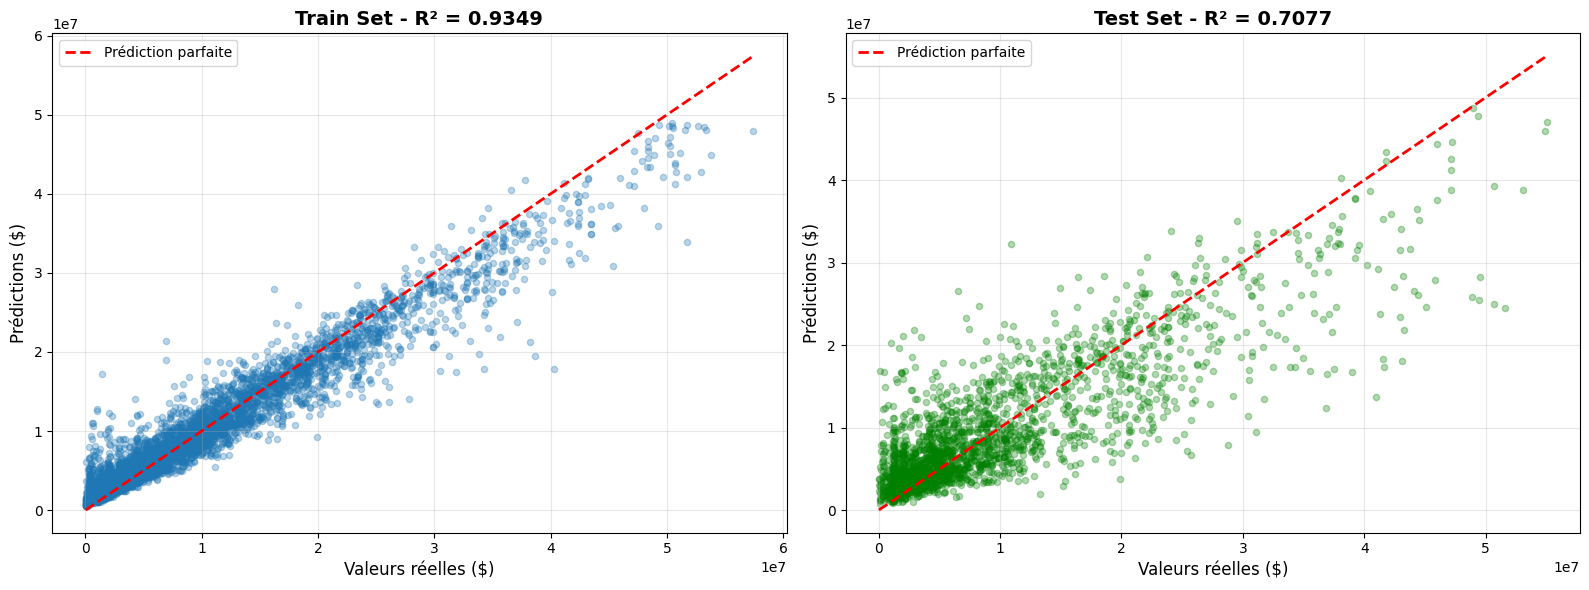

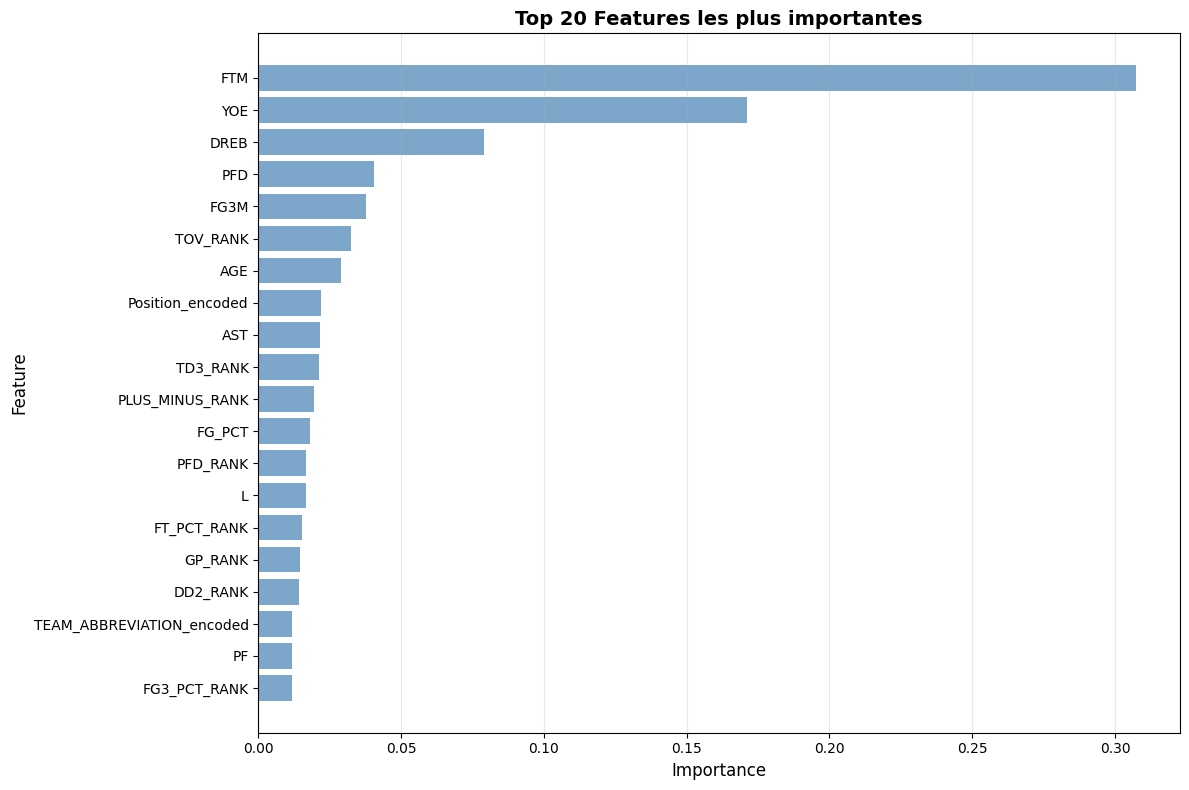


✅ ENTRAÎNEMENT TERMINÉ


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

print("="*80)
print("ENTRAÎNEMENT DU MODÈLE RANDOM FOREST")
print("="*80)

# 1. Préparer X et y à partir de df_preprocessed
# Filtrer les lignes où next_adjusted_salary est non nul
df_train = df_preprocessed[df_preprocessed['next_adjusted_salary'].notna()].copy()

print(f"\n1. Données disponibles pour l'entraînement: {len(df_train)} lignes")

# Séparer X et y
y = df_train['next_adjusted_salary']
X = df_train.drop(columns=['next_adjusted_salary', 'adjusted_salary'], errors='ignore')

print(f"\n2. Variable cible: next_adjusted_salary")
print(f"   Features: {X.shape[1]} colonnes")

# 2. Gérer les valeurs manquantes
X = X.fillna(X.median())
print(f"\n3. Valeurs manquantes gérées (remplacement par médiane)")

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\n4. Split des données:")
print(f"   Train: {len(X_train)} lignes ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test:  {len(X_test)} lignes ({len(X_test)/len(X)*100:.1f}%)")

# 4. Entraîner le modèle Random Forest
print(f"\n5. Entraînement du Random Forest en cours...")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train, y_train)

print(f"\n   ✓ Modèle entraîné avec succès!")

# 5. Prédictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# 6. Évaluation du modèle
print(f"\n{'='*80}")
print(f"RÉSULTATS DU MODÈLE")
print(f"{'='*80}")

# Métriques sur le train
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"\n📊 Performance sur l'ensemble d'ENTRAÎNEMENT:")
print(f"   R² Score:  {r2_train:.4f}")
print(f"   RMSE:      ${rmse_train:,.2f}")
print(f"   MAE:       ${mae_train:,.2f}")

# Métriques sur le test
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\n📊 Performance sur l'ensemble de TEST:")
print(f"   R² Score:  {r2_test:.4f}")
print(f"   RMSE:      ${rmse_test:,.2f}")
print(f"   MAE:       ${mae_test:,.2f}")

# 7. Importance des features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n{'='*80}")
print(f"TOP 15 FEATURES LES PLUS IMPORTANTES")
print(f"{'='*80}")
for idx, row in feature_importance.head(15).iterrows():
    print(f"   {row['feature']:30s} : {row['importance']:.4f}")

# 8. Visualisation des prédictions vs valeurs réelles
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Train
axes[0].scatter(y_train, y_pred_train, alpha=0.3, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='Prédiction parfaite')
axes[0].set_xlabel('Valeurs réelles ($)', fontsize=12)
axes[0].set_ylabel('Prédictions ($)', fontsize=12)
axes[0].set_title(f'Train Set - R² = {r2_train:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2: Test
axes[1].scatter(y_test, y_pred_test, alpha=0.3, s=20, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Prédiction parfaite')
axes[1].set_xlabel('Valeurs réelles ($)', fontsize=12)
axes[1].set_ylabel('Prédictions ($)', fontsize=12)
axes[1].set_title(f'Test Set - R² = {r2_test:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. Visualisation de l'importance des features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Features les plus importantes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print(f"✅ ENTRAÎNEMENT TERMINÉ")
print(f"{'='*80}")
